# Anomaly Detection using adtk on temperature time series dataset

In this notebook, we want to implement anomaly detection using adtk. We will use some of the detectors on a time series dataset.

## Load the Data

In [14]:
import pandas as pd, matplotlib.pyplot as plt
from adtk.detector import *
from adtk.visualization import plot

In [16]:
data = pd.read_csv("./monthly_csv.csv")

In [17]:
data

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


## preprocess the data

In [21]:
data.drop('Source', axis=1, inplace=True)

In [24]:
data['Date'] = pd.to_datetime(data['Date'])

In [28]:
data = data.set_index('Date')

In [29]:
data.describe()

,Mean
count,3288.000000
mean,0.036588
std,0.335255
min,-0.780000
25%,-0.208150
50%,-0.036600
75%,0.240000
max,1.350000


This is our actual data that is visualized as a time series diagram.

[<Axes: >]

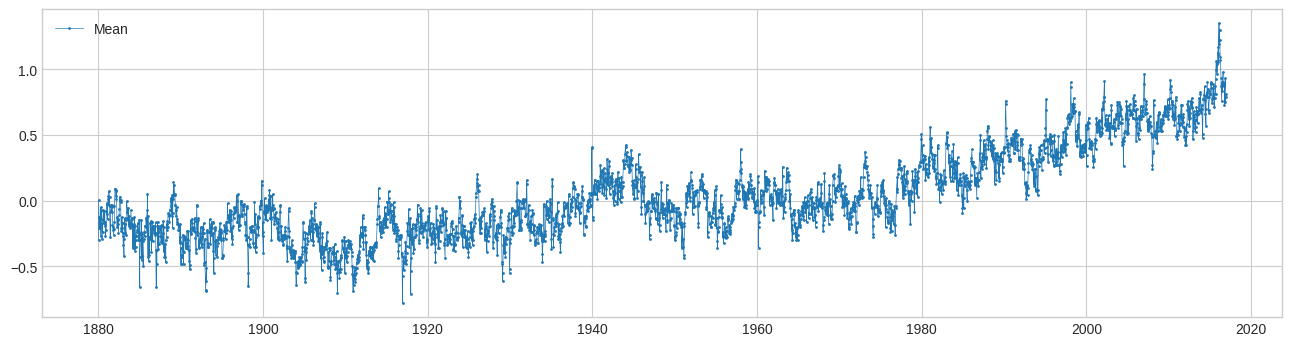

In [30]:
plot(data)

## Anomaly Detection

In Anomaly Detection tasks, your measurement and what range of data is the norm from your point of view is important, so based on your measurement, you can specify a range and the data that is outside that range can be considered as anomaly. You can see some of these detectors on [adtk website](https://adtk.readthedocs.io/en/stable/notebooks/demo.html#).

## Set custom numbers as threshold.

In [46]:
threshold = ThresholdAD(low=-0.7, high=0.7)

[<Axes: >]

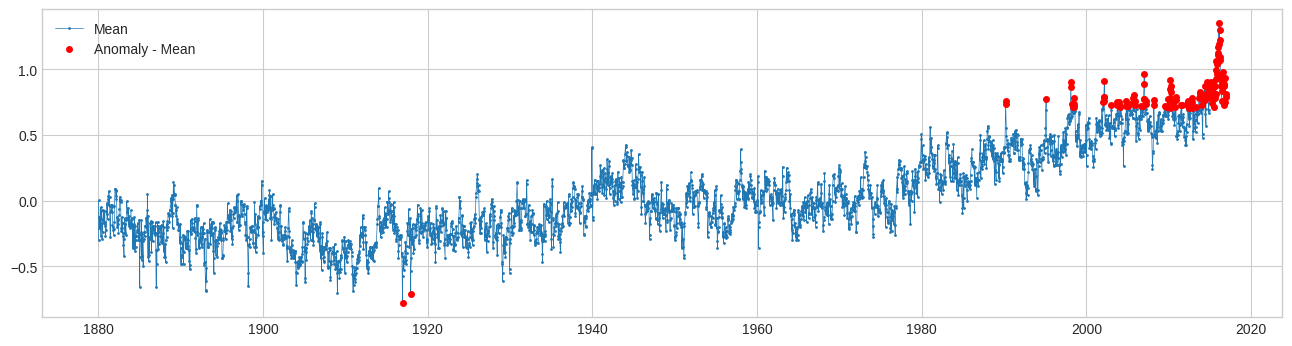

In [47]:
anomalies = threshold.detect(data)
plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')

## Set Quantile as threshold(range between 3% to 97%)

In [48]:
threshold = QuantileAD(low=0.03, high=0.97)

[<Axes: >]

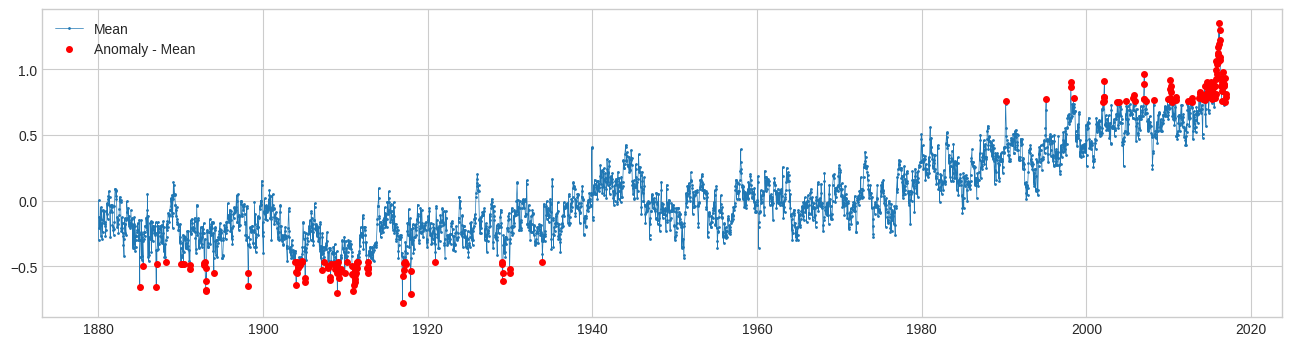

In [50]:
anomalies = threshold.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')

## Set Inter Quantile Range(IQR) as threshold (range between 25% to 75%)

In [53]:
threshold = InterQuartileRangeAD(c=1.5)

[<Axes: >]

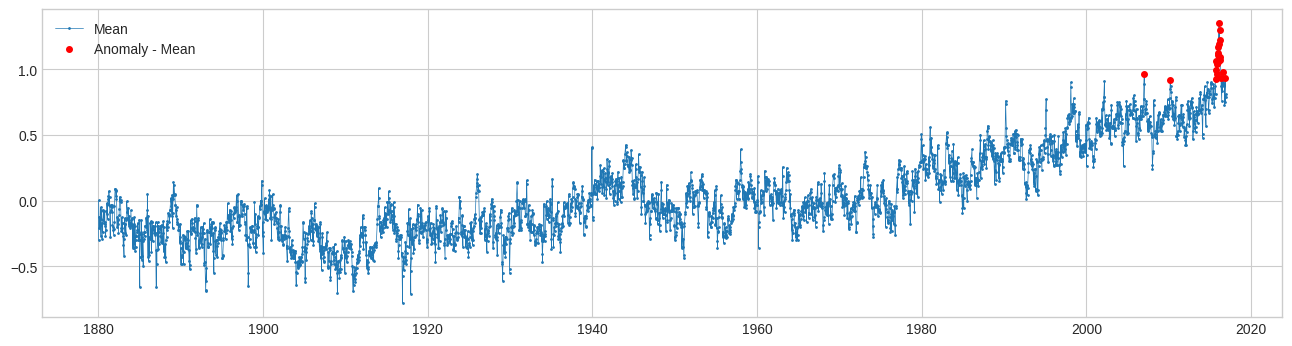

In [54]:
anomalies = threshold.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')

## Set Persist as threshold

In [55]:
threshold = PersistAD(c=3.0, side='positive')

[<Axes: >]

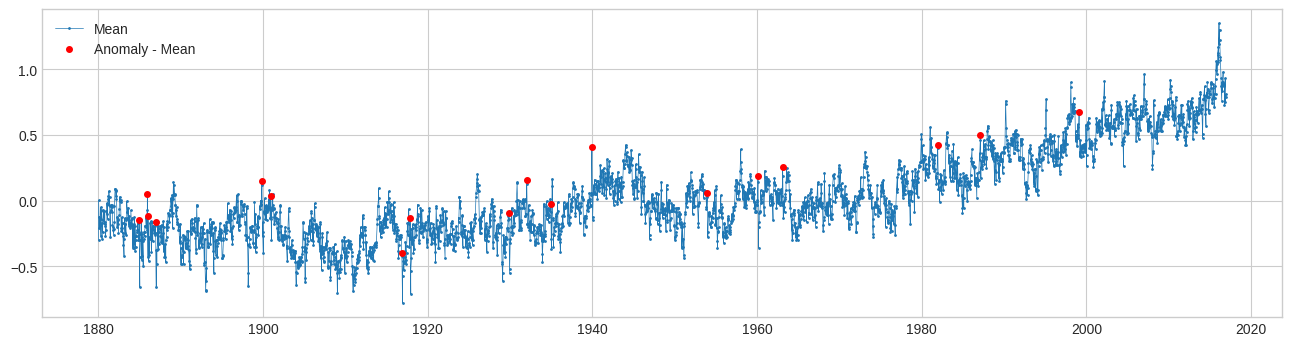

In [56]:
anomalies = threshold.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')

In [57]:
threshold = PersistAD(c=3.0, side='negative')

[<Axes: >]

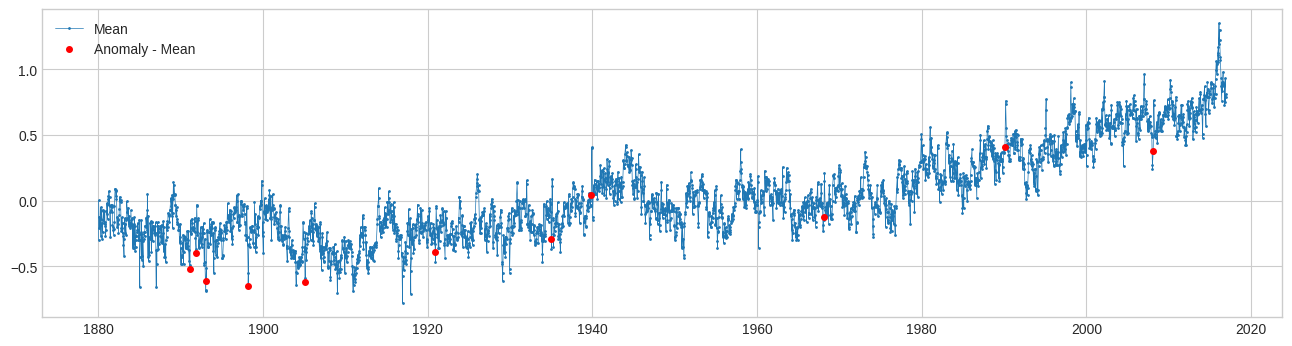

In [58]:
anomalies = threshold.fit_detect(data)
plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')

You can use any of these detectors based on your needs.